<a href="https://colab.research.google.com/github/Omarsesa/Lablab/blob/Image_variation_using_lambda_diffusers/Image_variation_using_lambda_diffusers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stable Diffusion Image Variations using lambda diffusers**

**download the necessary files**


In [ ]:
%cd /content
!git clone https://github.com/LambdaLabsML/lambda-diffusers.git


# Commits on Oct 17, 2022
%cd /content/lambda-diffusers
!git checkout 4d4386e5d2ae667d18987b1a505a47efc643e9c9

/content
Cloning into 'lambda-diffusers'...
remote: Enumerating objects: 270, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 270 (delta 19), reused 20 (delta 8), pack-reused 227
Receiving objects: 100% (270/270), 12.27 MiB | 12.50 MiB/s, done.
Resolving deltas: 100% (113/113), done.
/content/lambda-diffusers
Note: checking out '4d4386e5d2ae667d18987b1a505a47efc643e9c9'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at 4d4386e update spaces link


**install the required libs**

In [ ]:
%cd /content/lambda-diffusers


# for lambda-diffusers
!pip install -r requirements.txt

/content/lambda-diffusers
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu116
Obtaining file:///content/lambda-diffusers (from -r requirements.txt (line 9))
     |████████████████████████████████| 4.9 MB 12.7 MB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
     |████████████████████████████████| 3.1 MB 45.5 MB/s 
     |████████████████████████████████| 153 kB 71.1 MB/s 
     |████████████████████████████████| 4.9 MB 49.1 MB/s 
     |████████████████████████████████| 13.5 MB 48.3 MB/s 
     |████████████████████████████████| 163 kB 72.0 MB/s 
     |████████████████████████████████| 6.6 MB 53.2 MB/s 
     |████████████████████████████████| 46 kB 4.2 MB/s 
     |████████████████████████████████| 86 kB 6.8 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Attempting uninstall: sciki

**import the required libs**

In [ ]:
%cd /content/lambda-diffusers

from pathlib import Path
from lambda_diffusers import StableDiffusionImageEmbedPipeline
from PIL import Image
import torch
from torch import autocast

from diffusers import StableDiffusionPipeline
from google.colab.patches import cv2_imshow
import cv2



device = "cuda" if torch.cuda.is_available() else "cpu"

/content/lambda-diffusers


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

# **Image to Image**

initialize the model

In [ ]:
pipe = StableDiffusionImageEmbedPipeline.from_pretrained("lambdalabs/sd-image-variations-diffusers")
pipe = pipe.to(device)

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/7.47k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.62k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/493 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.65k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/260 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/748 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/527 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/335M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/316 [00:00<?, ?B/s]

**download the image**

--2022-11-07 19:08:04--  https://casie.jp/media/wp-content/uploads/2020/09/Van_Gogh_Self-Portrait_with_Straw_Hat_1887-Detroit.jpg
Resolving casie.jp (casie.jp)... 13.231.34.56, 54.250.8.152
Connecting to casie.jp (casie.jp)|13.231.34.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 731557 (714K) [image/jpeg]
Saving to: ‘inputs/test_01.jpg’

inputs/test_01.jpg  100%[===================>] 714.41K   789KB/s    in 0.9s    

2022-11-07 19:08:06 (789 KB/s) - ‘inputs/test_01.jpg’ saved [731557/731557]



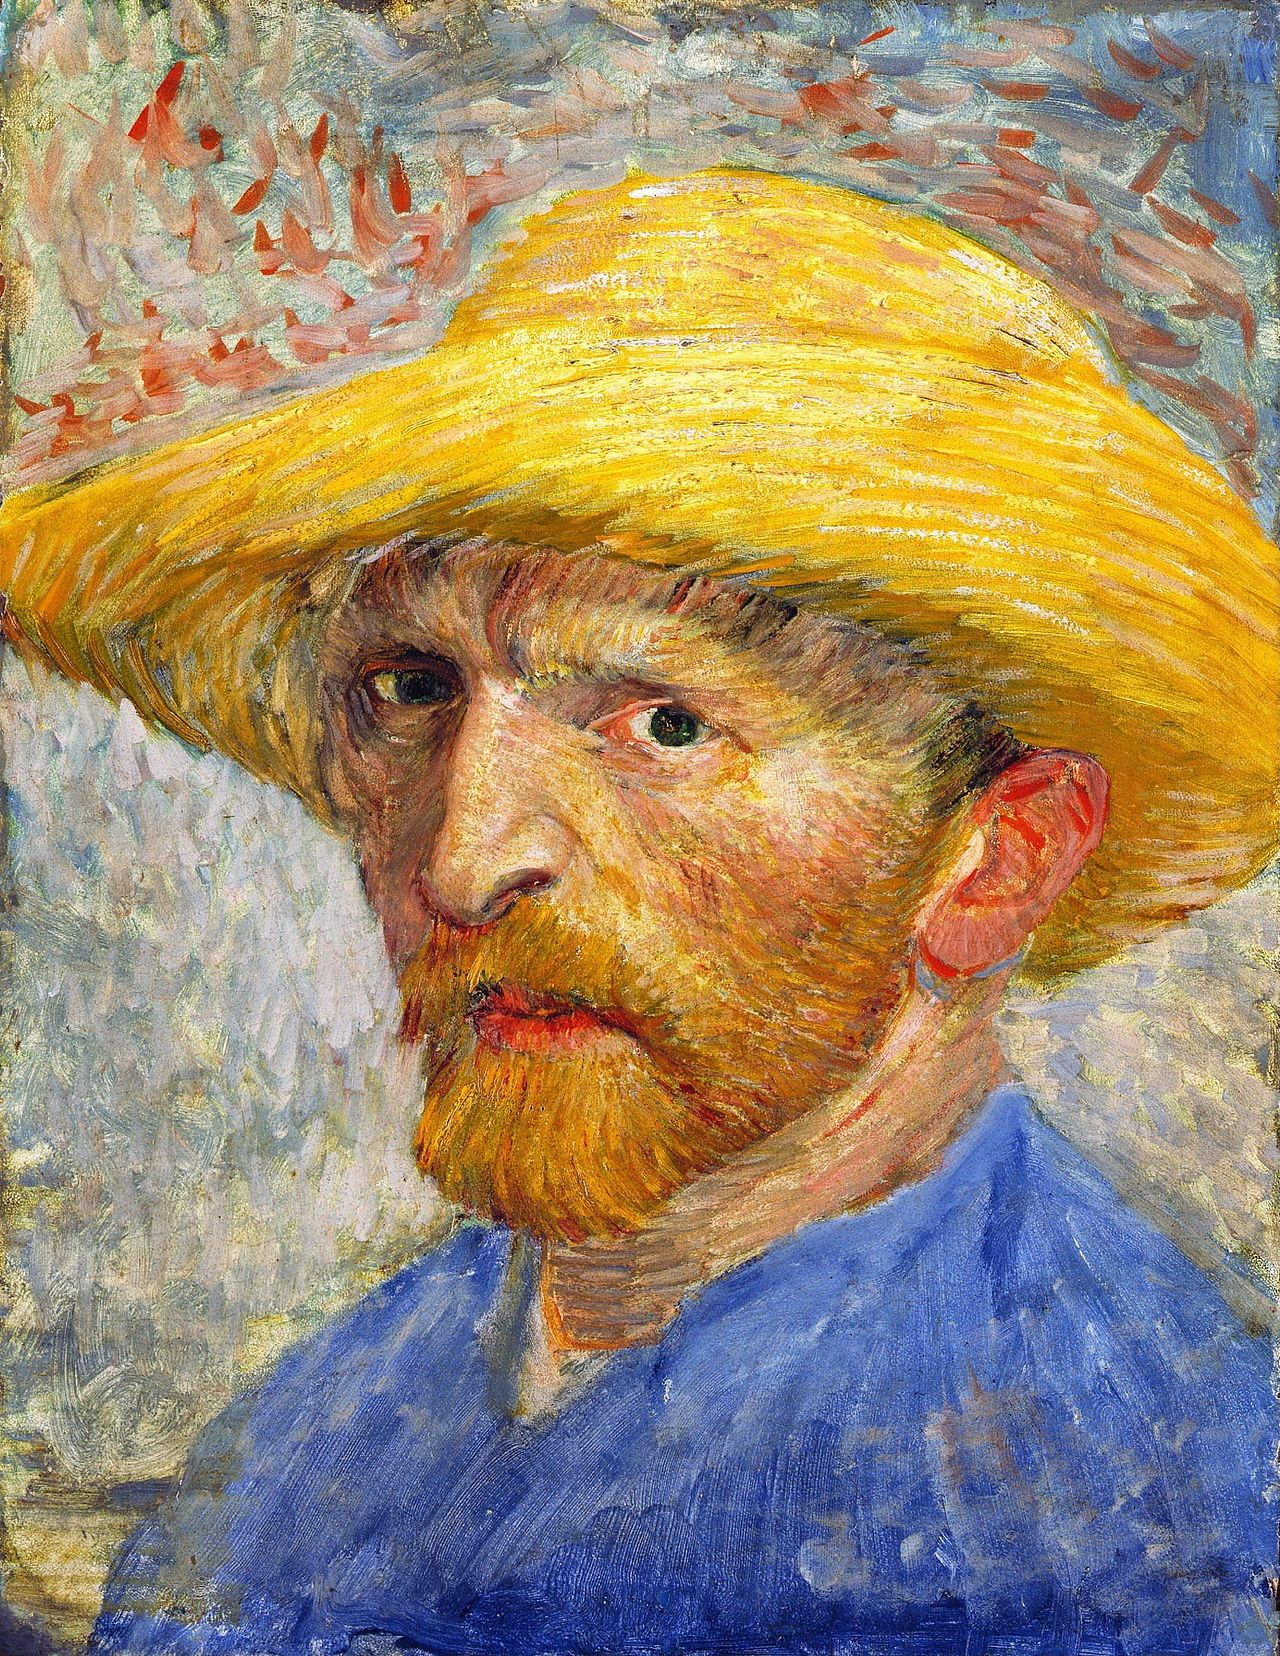

In [ ]:
!rm -rf outputs
!rm -rf inputs
!mkdir outputs inputs

!wget -c https://casie.jp/media/wp-content/uploads/2020/09/Van_Gogh_Self-Portrait_with_Straw_Hat_1887-Detroit.jpg \
      -O inputs/test_01.jpg
cv2_imshow(cv2.imread('inputs/test_01.jpg'))

**generate the images**

In [ ]:
input_img_path = "inputs/test_01.jpg"

im = Image.open(input_img_path)
num_samples = 2
image = pipe(num_samples*[im], guidance_scale=3.0)
image = image["sample"]

base_path = Path("outputs")
base_path.mkdir(exist_ok=True, parents=True)
for idx, im in enumerate(image):
  im.save(base_path/f"{idx:06}.jpg")

  0%|          | 0/51 [00:00<?, ?it/s]

**show the image**

In [ ]:


def hconcat_resize_min(im_list, interpolation=cv2.INTER_CUBIC):
  h_min = min(im.shape[0] for im in im_list)
  im_list_resize = [cv2.resize(im, (int(im.shape[1] * h_min / im.shape[0]), h_min), interpolation=interpolation) for im in im_list]
  
  return cv2.hconcat(im_list_resize)

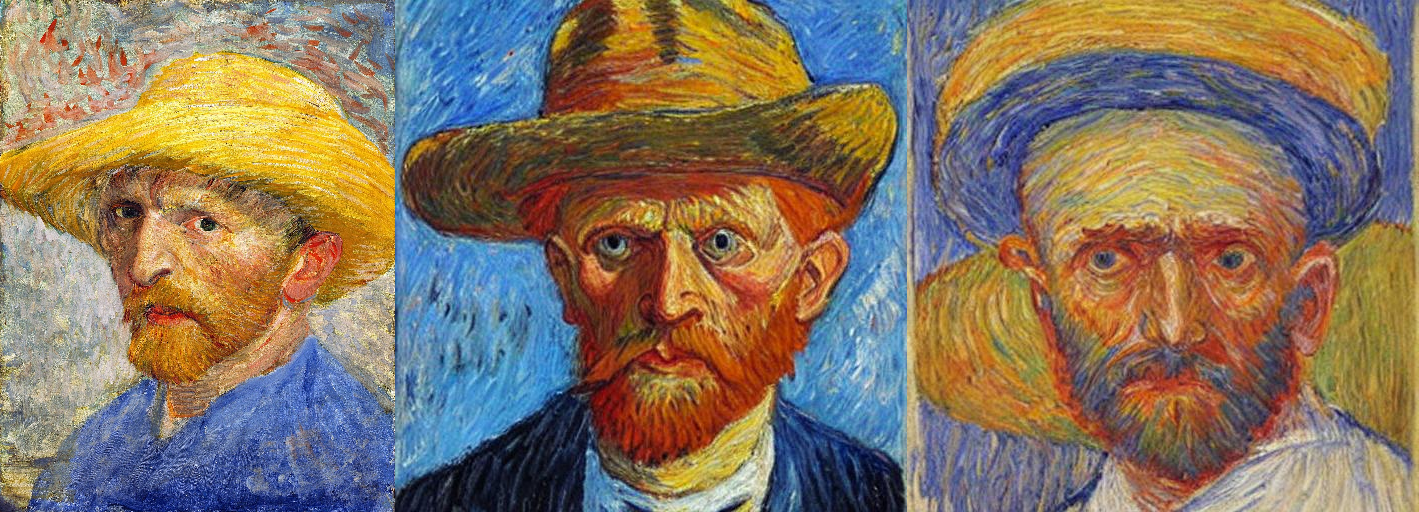

In [ ]:
input_cv_im = cv2.imread(input_img_path)

im_h = None
for i in range(num_samples):
  cv_im = cv2.imread(f"outputs/{i:06}.jpg")
  
  if i == 0:
    im_h = hconcat_resize_min([input_cv_im, cv_im])
  else:
    im_h = cv2.hconcat([im_h, cv_im])

cv2_imshow(im_h)
